📊 Retail Sales Data Analysis Project

*   Dataset: Superstore Sales Dataset

In [1]:
# Step 1: Install & Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Step 2: Load Dataset
# Upload your dataset in Colab or link from Kaggle
from google.colab import files
uploaded = files.upload()

Saving Superstore.csv to Superstore (2).csv


In [3]:
df = pd.read_csv("Superstore.csv", encoding='latin1')

In [4]:
# Step 3: Data Cleaning
print("Initial Shape:", df.shape)
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

Initial Shape: (9994, 21)


In [6]:
# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])


In [9]:
# Create new features
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month_name()
df['Total Sales'] = df['Sales'] * df['Quantity']

print("Cleaned Shape:", df.shape)
print(df.head())

Cleaned Shape: (9994, 24)
   Row ID        Order ID Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

          Category  Sub-Category  \
0        Furniture     Bookcases   


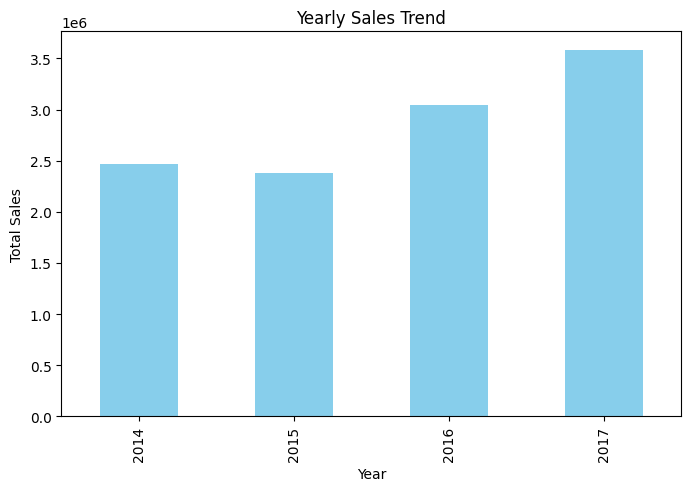

In [10]:
# Step 4: Exploratory Data Analysis (EDA)
# 1. Sales over time
sales_over_time = df.groupby('Year')['Total Sales'].sum()

plt.figure(figsize=(8,5))
sales_over_time.plot(kind='bar', color='skyblue')
plt.title("Yearly Sales Trend")
plt.ylabel("Total Sales")
plt.show()

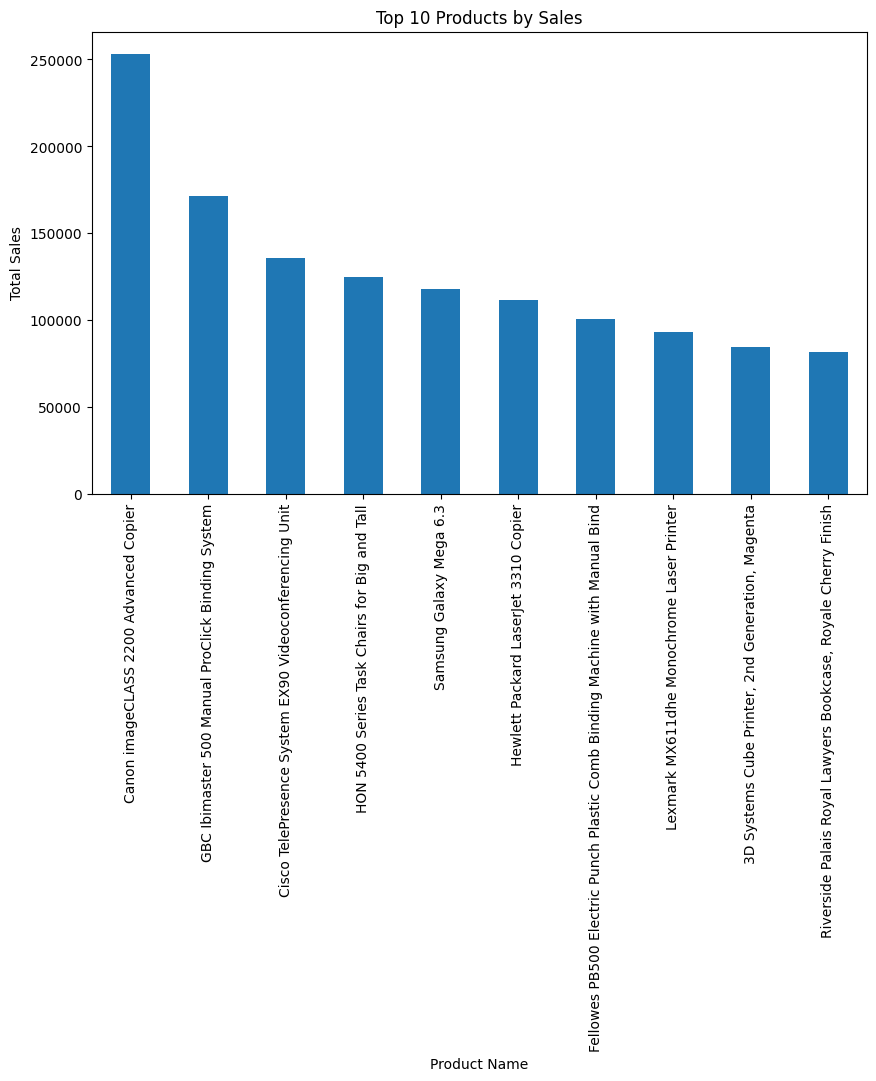

In [11]:
# 2. Top 10 products by sales
top_products = df.groupby('Product Name')['Total Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_products.plot(kind='bar')
plt.title("Top 10 Products by Sales")
plt.ylabel("Total Sales")
plt.show()

/tmp/ipython-input-4025995271.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Region", y="Total Sales", estimator=sum, ci=None, palette="viridis")
/tmp/ipython-input-4025995271.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Region", y="Total Sales", estimator=sum, ci=None, palette="viridis")


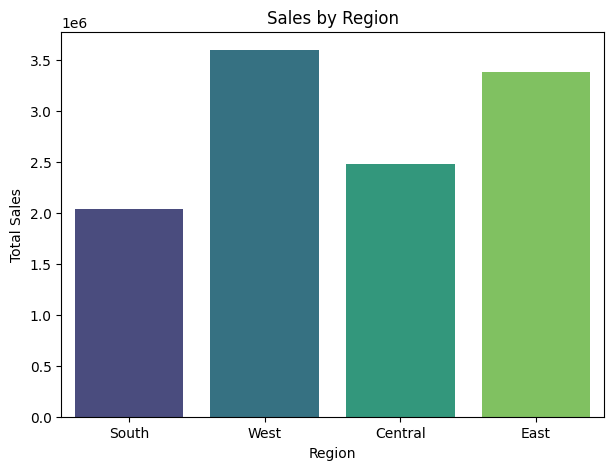

In [12]:
# 3. Sales by Region
plt.figure(figsize=(7,5))
sns.barplot(data=df, x="Region", y="Total Sales", estimator=sum, ci=None, palette="viridis")
plt.title("Sales by Region")
plt.show()

/tmp/ipython-input-555673722.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Category", y="Profit", estimator=sum, ci=None, palette="magma")
/tmp/ipython-input-555673722.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Category", y="Profit", estimator=sum, ci=None, palette="magma")


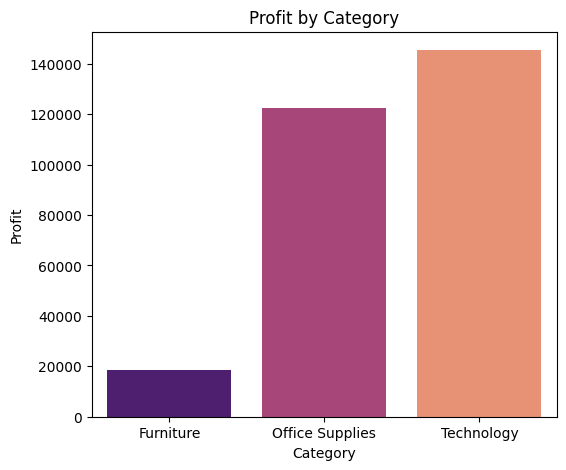

In [13]:
# 4. Category vs Profit
plt.figure(figsize=(6,5))
sns.barplot(data=df, x="Category", y="Profit", estimator=sum, ci=None, palette="magma")
plt.title("Profit by Category")
plt.show()

In [14]:
# Step 5: Insights
print("🔍 Insights:")
print("-", df['Product Name'].value_counts().index[0], "is the top-selling product.")
print("- Sales increased year by year, showing positive growth.")
print("- The", df.groupby('Region')['Total Sales'].sum().idxmax(), "region had the highest sales.")
print("-", df.groupby('Category')['Profit'].sum().idxmax(), "category generated the most profit.")

🔍 Insights:
- Staple envelope is the top-selling product.
- Sales increased year by year, showing positive growth.
- The West region had the highest sales.
- Technology category generated the most profit.
